This is what I have learned in the course "Python for finance analysis" by Xuhu Wan in Coursera.

# Python for finance analysis

First, we will import the libraries that we are going to use

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline
from scipy.stats import norm
from pandas.tools.plotting import scatter_matrix

For the data, we are going to import the documents from Yahoo Finance, in Historic Data we can download all the data from one stock. In this case, we are going to use Facebook and Microsoft stock. 

In [2]:
fb = pd.DataFrame.from_csv("C:/Users/ramir/Documents/Finanzas/FB.csv")

C:\Users\ramir\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


In [3]:
type(fb)

pandas.core.frame.DataFrame

In [4]:
fb.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-01,167.830002,168.899994,167.279999,168.699997,168.699997,10381500
2019-04-02,170.139999,174.899994,169.550003,174.199997,174.199997,23946500
2019-04-03,174.500000,177.960007,172.949997,173.539993,173.539993,27590100
2019-04-04,176.020004,178.000000,175.529999,176.020004,176.020004,17847700
2019-04-05,176.880005,177.000000,175.100006,175.720001,175.720001,9594100


In [5]:
ms =  pd.DataFrame.from_csv("C:/Users/ramir/Documents/Finanzas/MSFT.csv")
ms.head()

C:\Users\ramir\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-01,118.949997,119.110001,118.099998,119.019997,117.465858,22789100
2019-04-02,119.059998,119.480003,118.519997,119.190002,117.633636,18142300
2019-04-03,119.860001,120.430000,119.150002,119.970001,118.403458,22860700
2019-04-04,120.099998,120.230003,118.379997,119.360001,117.801422,20112800
2019-04-05,119.389999,120.230003,119.370003,119.889999,118.324493,15826200


In [6]:
print(ms.iloc[0, 0])

118.949997


In [7]:
fb.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
fb.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-24,155.210007,161.309998,152.570007,160.979996,160.979996,30440400
2020-03-25,158.919998,162.990005,153.059998,156.210007,156.210007,35184300
2020-03-26,158.250000,164.000000,157.020004,163.339996,163.339996,26556800
2020-03-27,158.199997,160.089996,154.750000,156.789993,156.789993,24879900
2020-03-30,159.179993,166.750000,158.059998,165.949997,165.949997,22488400


In [9]:
fb[['Open','Close']].head()

,Open,Close
Date,,
2019-04-01,167.830002,168.699997
2019-04-02,170.139999,174.199997
2019-04-03,174.500000,173.539993
2019-04-04,176.020004,176.020004
2019-04-05,176.880005,175.720001


In [10]:
fb.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,190.599048,192.746111,188.316270,190.648531,190.648531,1.649657e+07
std,14.983769,14.415085,15.486429,14.966229,14.966229,8.538702e+06
min,139.750000,148.179993,137.100006,146.009995,146.009995,6.046300e+06
25%,181.989994,184.004993,180.015003,181.682495,181.682495,1.113395e+07
50%,190.000000,191.435005,187.745002,189.544998,189.544998,1.381220e+07
75%,200.000000,202.365002,198.095005,199.759998,199.759998,1.818788e+07
max,222.570007,224.199997,221.279999,223.229996,223.229996,5.605960e+07


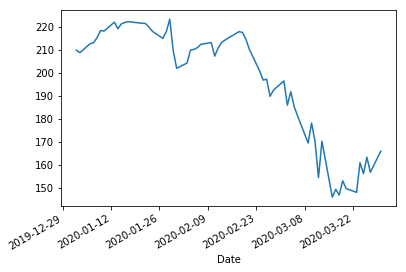

In [11]:
fb_plot = fb.Close['2020-01-01' : '2020-03-30'].plot()
fb_plot

In [12]:
fb['Close'].var()

223.98801563946165

In [13]:
fb.Close['2020-01-01' : '2020-03-30'].var()

625.4807837877808

In [14]:
#With shift operator we move a hole column up. Like this we put a new column with the close price of tomorrow:
fb['Price1'] = fb['Close'].shift(-1)
fb.head()

,Open,High,Low,Close,Adj Close,Volume,Price1
Date,,,,,,,
2019-04-01,167.830002,168.899994,167.279999,168.699997,168.699997,10381500,174.199997
2019-04-02,170.139999,174.899994,169.550003,174.199997,174.199997,23946500,173.539993
2019-04-03,174.500000,177.960007,172.949997,173.539993,173.539993,27590100,176.020004
2019-04-04,176.020004,178.000000,175.529999,176.020004,176.020004,17847700,175.720001
2019-04-05,176.880005,177.000000,175.100006,175.720001,175.720001,9594100,174.929993


In [15]:
#Like this we create a new column PriceDiff that is the diference between the price of tomorrow and the close price of today
fb['PriceDiff'] = fb['Price1'] - fb['Close']
fb.head()

,Open,High,Low,Close,Adj Close,Volume,Price1,PriceDiff
Date,,,,,,,,
2019-04-01,167.830002,168.899994,167.279999,168.699997,168.699997,10381500,174.199997,5.500000
2019-04-02,170.139999,174.899994,169.550003,174.199997,174.199997,23946500,173.539993,-0.660004
2019-04-03,174.500000,177.960007,172.949997,173.539993,173.539993,27590100,176.020004,2.480011
2019-04-04,176.020004,178.000000,175.529999,176.020004,176.020004,17847700,175.720001,-0.300003
2019-04-05,176.880005,177.000000,175.100006,175.720001,175.720001,9594100,174.929993,-0.790008


In [16]:
fb['Return'] = fb['PriceDiff']/fb['Close']
fb.head()

,Open,High,Low,Close,Adj Close,Volume,Price1,PriceDiff,Return
Date,,,,,,,,,
2019-04-01,167.830002,168.899994,167.279999,168.699997,168.699997,10381500,174.199997,5.500000,0.032602
2019-04-02,170.139999,174.899994,169.550003,174.199997,174.199997,23946500,173.539993,-0.660004,-0.003789
2019-04-03,174.500000,177.960007,172.949997,173.539993,173.539993,27590100,176.020004,2.480011,0.014291
2019-04-04,176.020004,178.000000,175.529999,176.020004,176.020004,17847700,175.720001,-0.300003,-0.001704
2019-04-05,176.880005,177.000000,175.100006,175.720001,175.720001,9594100,174.929993,-0.790008,-0.004496


In [17]:
fb['Direction'] = [1 if fb.loc[x, 'PriceDiff'] > 0 else -1 #condition
                  for x in fb.index] #for every item in index
fb.head()

,Open,High,Low,Close,Adj Close,Volume,Price1,PriceDiff,Return,Direction
Date,,,,,,,,,,
2019-04-01,167.830002,168.899994,167.279999,168.699997,168.699997,10381500,174.199997,5.500000,0.032602,1
2019-04-02,170.139999,174.899994,169.550003,174.199997,174.199997,23946500,173.539993,-0.660004,-0.003789,-1
2019-04-03,174.500000,177.960007,172.949997,173.539993,173.539993,27590100,176.020004,2.480011,0.014291,1
2019-04-04,176.020004,178.000000,175.529999,176.020004,176.020004,17847700,175.720001,-0.300003,-0.001704,-1
2019-04-05,176.880005,177.000000,175.100006,175.720001,175.720001,9594100,174.929993,-0.790008,-0.004496,-1


In [18]:
#Now we are going to calculate the avearage movement of prices of three days
fb['Average3'] = (fb['Close'] + fb['Close'].shift(1)
                 + fb['Close'].shift(2))/3
fb.head()

#With shift one we move the hole column downward one road. So, the price is the one of yesterday.
#Shift 2 moves the columns by 3 downward. 

,Open,High,Low,Close,Adj Close,Volume,Price1,PriceDiff,Return,Direction,Average3
Date,,,,,,,,,,,
2019-04-01,167.830002,168.899994,167.279999,168.699997,168.699997,10381500,174.199997,5.500000,0.032602,1,NaN
2019-04-02,170.139999,174.899994,169.550003,174.199997,174.199997,23946500,173.539993,-0.660004,-0.003789,-1,NaN
2019-04-03,174.500000,177.960007,172.949997,173.539993,173.539993,27590100,176.020004,2.480011,0.014291,1,172.146662
2019-04-04,176.020004,178.000000,175.529999,176.020004,176.020004,17847700,175.720001,-0.300003,-0.001704,-1,174.586665
2019-04-05,176.880005,177.000000,175.100006,175.720001,175.720001,9594100,174.929993,-0.790008,-0.004496,-1,175.093333


In [19]:
fb['MA40'] = fb['Close'].rolling (40).mean()
fb['MA200'] = fb['Close'].rolling (200).mean()

fb.head()

,Open,High,Low,Close,Adj Close,Volume,Price1,PriceDiff,Return,Direction,Average3,MA40,MA200
Date,,,,,,,,,,,,,
2019-04-01,167.830002,168.899994,167.279999,168.699997,168.699997,10381500,174.199997,5.500000,0.032602,1,NaN,NaN,NaN
2019-04-02,170.139999,174.899994,169.550003,174.199997,174.199997,23946500,173.539993,-0.660004,-0.003789,-1,NaN,NaN,NaN
2019-04-03,174.500000,177.960007,172.949997,173.539993,173.539993,27590100,176.020004,2.480011,0.014291,1,172.146662,NaN,NaN
2019-04-04,176.020004,178.000000,175.529999,176.020004,176.020004,17847700,175.720001,-0.300003,-0.001704,-1,174.586665,NaN,NaN
2019-04-05,176.880005,177.000000,175.100006,175.720001,175.720001,9594100,174.929993,-0.790008,-0.004496,-1,175.093333,NaN,NaN


Pandas dataframe.rolling() function provides the feature of rolling window calculations. The concept of rolling window calculation is most primarily used in signal processing and time series data. In a very simple words we take a window size of k at a time and perform some desired mathematical operation on it. A window of size k means k consecutive values at a time. In a very simple case all the ‘k’ values are equally weighted.

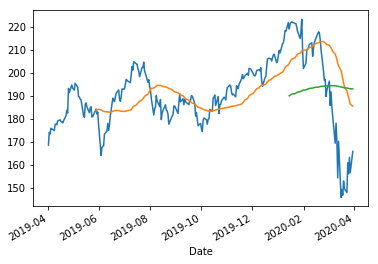

In [20]:
fb['Close'].plot()
fb['MA40'].plot()
fb['MA200'].plot()

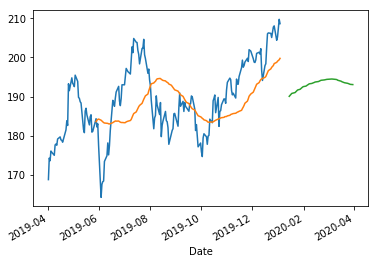

In [21]:
fb.loc['01-12-2019':'01-04-2020','Close'].plot()
fb.loc['01-12-2019':'01-04-2020', 'MA40'].plot()
fb['MA200'].plot()

We can see how the average of prices of 40 days (orange) are compared to the original close price. We can see that the MA40 is a "fast signal" and the MA200 is a slow signal which reflects the price over a long history. If MA40 is above MA200 (MA40 > MA200) some traders who we call trend-following traders, they believe the stock price will move upwards for a while. 

## Simple strategy of stock trading

Moving average of stock period is more asociated with recent change of stock price (fast signal). 

In [22]:
ms.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-01,118.949997,119.110001,118.099998,119.019997,117.465858,22789100
2019-04-02,119.059998,119.480003,118.519997,119.190002,117.633636,18142300
2019-04-03,119.860001,120.430000,119.150002,119.970001,118.403458,22860700
2019-04-04,120.099998,120.230003,118.379997,119.360001,117.801422,20112800
2019-04-05,119.389999,120.230003,119.370003,119.889999,118.324493,15826200


In [23]:
ms['MA10'] =  ms['Close'].rolling(10).mean() #fast signal
ms['MA50'] =  ms['Close'].rolling(90).mean() #slow signal

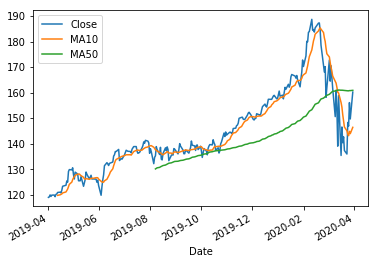

In [24]:
ms['Close'].plot(legend = True)
ms['MA10'].plot(legend = True)
ms['MA50'].plot(legend = True)

If MA10 is greater than MA50, it is believed that the stock price will go up in the next several days.Otherwise, the price will decrease. So, the strategy is, that is MA10 is greater than MA50, we will buy a share of a stock. We can create a variable called shares to denote if we long or not (if we will buy or not). 

In [25]:
ms['Shares'] = [1 if ms.loc[x, 'MA10'] > ms.loc[x, 'MA50'] else 0
               for x in ms.index]

#'Shares' is equal to 1 if MA10 is larger than MA50, otherwise it is 0.

Next, we will compute daily profit. First, we create a new variable with the close price of tomorrow. 

In [26]:
ms['Close1'] = ms['Close'].shift(-1)

Then, we will create a new variable called Porfit, which is the daily profit if it is negative, we lose money on that day, if positive we earn money that day. 

In [27]:
ms['Profit'] = [ms.loc[x, 'Close1'] - ms.loc[x, 'Close']
               if ms.loc[x, 'Shares'] == 1
               else 0 for x in ms.index]

#If shares is equal to 1, the daily profit is the close price of tomorrow minus the close price of today.
#If shares is equal to 0, it means that we do not haver stocks at hand. 

We can plot the profit to see which days we make money, and wich days we loose. 

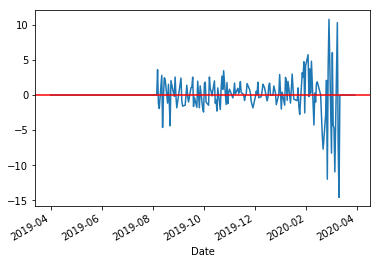

In [28]:
ms['Profit'].plot()
plt.axhline(y=0, color='red')

The values that are above 0 is where we gain money, and the values down the 0 is where we loose money. 

We can also compute the cumulative wealth. For this we are going to use cumsum (Return cumulative sum over a DataFrame or Series axis.)

In [29]:
ms['Wealth'] = ms['Profit'].cumsum()

#cumsum is to compute cumulative wealth.

In [30]:
ms.tail()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares,Close1,Profit,Wealth
Date,,,,,,,,,,,,
2020-03-24,143.750000,149.600006,141.270004,148.339996,148.339996,82516700,143.829001,160.718444,0,146.919998,0.0,3.779999
2020-03-25,148.910004,154.330002,144.440002,146.919998,146.919998,75638200,143.158000,160.714111,0,156.110001,0.0,3.779999
2020-03-26,148.399994,156.660004,148.369995,156.110001,156.110001,64568100,144.863000,160.803555,0,149.699997,0.0,3.779999
2020-03-27,151.750000,154.889999,149.199997,149.699997,149.699997,57042300,143.950000,160.800555,0,160.229996,0.0,3.779999
2020-03-30,152.440002,160.600006,150.009995,160.229996,160.229996,63132100,146.431000,160.910444,0,NaN,0.0,3.779999


When we check the tail aprt of the Data Frame we are going to see if we make money or loose money. Thise strategy make us gain 3.79 dolars per stock we have bought. 

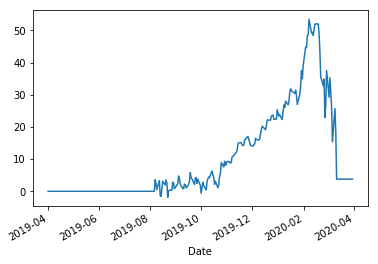

In [31]:
ms['Wealth'].plot()

This strategy seems to be intresting up to the crack of the Covid-19. 

Now, it is important to apply some statistics. MA10 and MA50 are called random variables. Which is the probability that some of those occurs? How is the frecuency of each? We must ask all these questions to avoid loses.

## Basic concepts of random variables

Random variables are like the dices. When we throw them, we can expect random values each time. If we roll the dices 50 times, we get 50 observations. The sum of the two faces is the random variable that we are going to call it "x". There is a difference between the discrete variables (integer numbers) vs continues variables (float numbers). The daily return of a stock is a continue variable. We are going to do the dice example:

In [32]:
die = pd.DataFrame([1,2,3,4,5,6])
trial = 50
results = [die.sample(2, replace=True).sum().loc[0] for i in range (trial)]
results[:10]

[4, 10, 8, 4, 8, 7, 8, 5, 4, 8]

Frecuency of observed outcomes. Totally, we tried 50 times and we get 50 realized outcomes of sum. Now, we want to calculate the frecuency in this collection of outcomes. For this, we are going to use the pandas method value_counts (method to count values).

In [33]:
freq = pd.DataFrame(results)[0].value_counts()
sort_freq = freq.sort_index()
sort_freq

3     2
4     4
5     5
6     3
7     9
8     7
9     8
10    6
11    5
12    1
Name: 0, dtype: int64

Here, we can see the values and the frecuency that they had when we trhow the two dices.So, the sum 8 came out 9 times. We can plot the frecuency using a bar chart. 

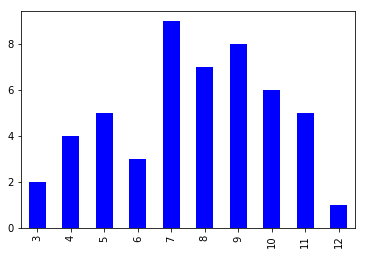

In [34]:
sort_freq.plot(kind='bar', color='blue')

We can also make the relative frecuency = frecuency/number of trials. The chart won't change, buy will chenge the Y axis. As we increase the number of trails, the relative frecuency becomes more and more stable. 

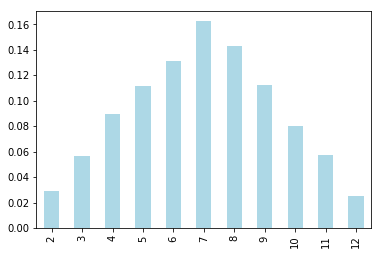

In [35]:
trial = 4000
results = [die.sample(2, replace=True).sum().loc[0] for i in range (trial)]
freq = pd.DataFrame(results)[0].value_counts()
sort_freq = freq.sort_index()
relative_freq = sort_freq/trial
relative_freq.plot(kind='bar', color='lightblue')

As we can see, it is very similar to a normal distribution. 

Mean (or expectation) and variables are two characteristics of the distribution of random variables. The mean is the sum of the possible otcome x the probability for that outcome. The variance describes the variation of an outcome, which formula is the sum of the (possible outcome - Mean)squared x probability of that to become. 

So, for discrete random variables we can find probability easily by checking the table of the distribution. It is more complicated in continuous cases, where it is the area under the probability density function. Ths distribution of a stock return is continous. 

## Models of distribution 

In [36]:
appl = pd.DataFrame.from_csv('C:/Users/ramir/Documents/Finanzas/apple.csv')

C:\Users\ramir\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


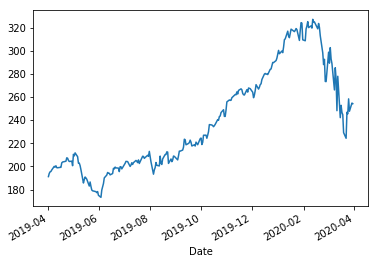

In [37]:
appl['Close'].plot()

From August 2012 to May 2013, the stock price drop over 40%. So, we need to compute what's the chance that the yearly return can be less than negative 40%. Is that possible or just an extreme case like black swan? We compute log daily return for stock price of Apple. 

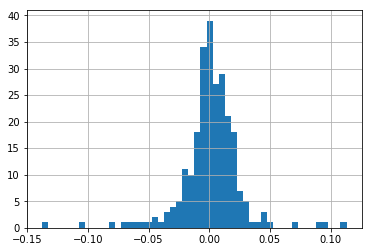

In [38]:
appl['LogReturn'] = np.log(appl['Close']).shift(-1) - np.log(appl['Close'])
appl['LogReturn'].hist(bins=50)

The histogram that we see is very similar to a normal distribution. 

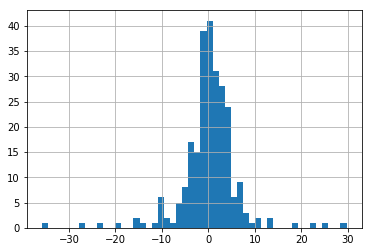

In [39]:
appl['Return'] = appl['Close'].shift(-1) - appl['Close']
appl['Return'].hist(bins=50)

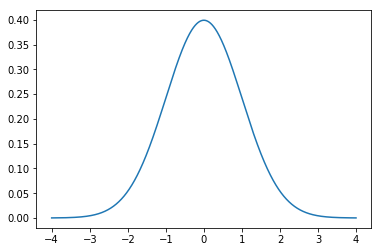

In [40]:
density = pd.DataFrame()
density['x'] = np.arange(-4,4,0.001)
density['pdf'] = norm.pdf(density['x'],0,1)
density['cdf'] = norm.cdf(density['x'],0,1)

plt.plot(density['x'], density['pdf'])

This is the graph of the normal density, symmetric with a mean and symmetric center. It is also bell shaped.

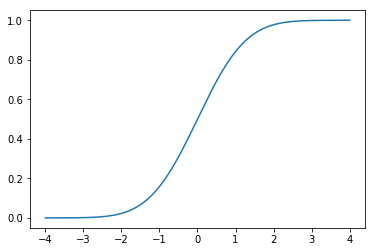

In [41]:
plt.plot(density['x'], density['cdf'])

This is the cumulative distribution function, where x takes large values. The cummulative probability will aproach 1. We can model daily stock return using normal distribution. We do not know the real mean and standard deviation of the normal distribution of Apple stock. We can calculate the mean and std deviation in the collection of the historic data which will not be the same but there will be close enought. 

In [42]:
mu = appl['LogReturn'].mean()
sigma = appl['LogReturn'].std(ddof = 1)
print (mu, sigma)

0.0011307385340900366 0.02453610719067392


So, our objective is to know the probability to Apple stock to drop more than 40% in one year (220 days of stock trading). To do this, we will assume that the daily returns are indeptendent, what is a mistake and is not true. 

In [43]:
mu220 = 220*mu
sigma220 = 220**0.5*sigma
print(mu220, sigma220)

print('The probability of falling over 40% in 220 days is ',
     norm.cdf(-0.4, mu220, sigma220))

0.24876247749980804 0.36392928205338587
The probability of falling over 40% in 220 days is  0.03732076527047984


This means, that there is a 3.7% of probabilities that the stock will fall more than 40% in one year.

In finance there is an important risk meassure called VaR (value at risk). The VaR estimates how much a set of investments might lose with a gain probability. It is usually used to estimate the amount of asses needed to cover possible loss. For example: 5% of quantile of daily return is called a 95% VaR or VaR at the level of 95%. 


Is it good to use the normal distribution to the stocks? Fama and French says that the returns are rather symmetric about their means, but the tails are fatter, that means that there are more outliers than expected with normal distributions. This menas that returns on the tails (negatives or positives) may occure more often than we expected. 

Before continuing we are going to practice with Microsoft stock.

### Practice with Microsoft stock

In [44]:
ms.head()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares,Close1,Profit,Wealth
Date,,,,,,,,,,,,
2019-04-01,118.949997,119.110001,118.099998,119.019997,117.465858,22789100,NaN,NaN,0,119.190002,0.0,0.0
2019-04-02,119.059998,119.480003,118.519997,119.190002,117.633636,18142300,NaN,NaN,0,119.970001,0.0,0.0
2019-04-03,119.860001,120.430000,119.150002,119.970001,118.403458,22860700,NaN,NaN,0,119.360001,0.0,0.0
2019-04-04,120.099998,120.230003,118.379997,119.360001,117.801422,20112800,NaN,NaN,0,119.889999,0.0,0.0
2019-04-05,119.389999,120.230003,119.370003,119.889999,118.324493,15826200,NaN,NaN,0,119.930000,0.0,0.0


In [45]:
ms['LogReturn'] = np.log(ms['Close']).shift(-1) - np.log(ms['Close'])

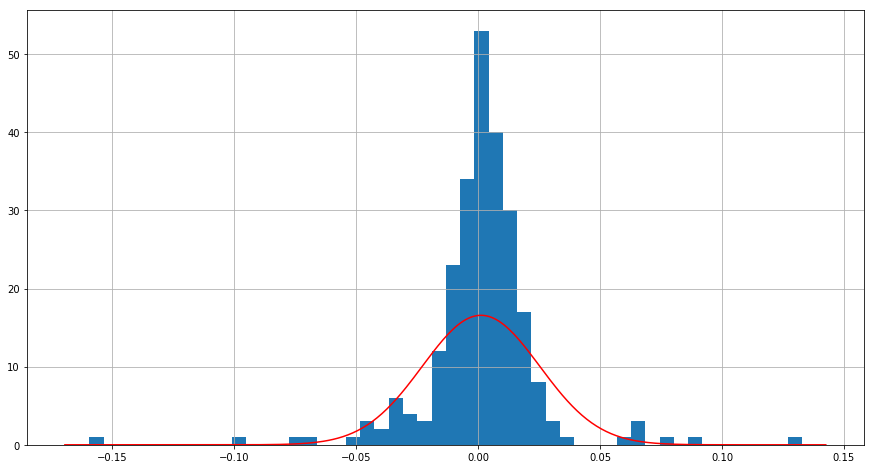

In [46]:
mu = ms['LogReturn'].mean()
sigma = ms['LogReturn'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(ms['LogReturn'].min()-0.01, ms['LogReturn'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma) #Normal distribution

ms['LogReturn'].hist(bins=50, figsize=(15, 8))
plt.plot(density['x'], density['pdf'], color='red')
plt.show()

In [47]:
# probability that the stock price of microsoft will drop over 5% in a day
prob_return1 = norm.cdf(-0.05, mu, sigma)
print('The Probability is ', prob_return1*100,'%')

The Probability is  1.6751927864489238 %


In [48]:
# probability that the stock price of microsoft will drop over 10% in a day
prob_return2 = norm.cdf(-0.10, mu, sigma)
print('The Probability is ', prob_return2)

The Probability is  1.3182552258618564e-05


#### Calculate the probability of the stock price will drop over a certain percentage in a year

In [49]:
mu220 = 220*mu
sigma220 = (220**0.5) * sigma
print('The probability of dropping over 40% in 220 days is ', norm.cdf(-0.4, mu220, sigma220))

The probability of dropping over 40% in 220 days is  0.03216375321197867


In [50]:
# drop over 20% in 220 days
mu220 = 220*mu
sigma220 = (220**0.5) * sigma
drop20 = norm.cdf(-0.2, mu220, sigma220)
print('The probability of dropping over 20% in 220 days is ', drop20)

The probability of dropping over 20% in 220 days is  0.09855415140925161


#### Calculate Value at risk (VaR)

In [51]:
# Value at risk(VaR)
VaR = norm.ppf(0.05, mu, sigma)
print('Single day value at risk ', VaR)

Single day value at risk  -0.03841628848096878


In [52]:
# Quatile 
# 5% quantile
print('5% quantile ', norm.ppf(0.05, mu, sigma))
# 95% quantile
print('95% quantile ', norm.ppf(0.95, mu, sigma))

5% quantile  -0.03841628848096878
95% quantile  0.04078536208291948


In [53]:
#25% and 75% Quantile of the return
# 25% quantile
q25 = norm.ppf(0.25, mu, sigma)
print('25% quantile ', q25)
# 75% quantile
q75 = norm.ppf(0.75, mu, sigma) 
print('75% quantile ', q75)

25% quantile  -0.015054203421448819
75% quantile  0.017423277023399544


CDF is used to calculate an area under the bell directly. 
PFF is used to calculate an area -1 under the bell. 

## Importing data from Yahoo Finance

In [54]:
import datetime
import pandas_datareader.data as web

In [55]:
start = datetime.datetime(2010, 1, 1) #starting date
end = datetime.datetime(2020, 4, 1) #ending date

df = web.DataReader("AAPL", 'yahoo', start, end) #(stock, platform, start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-03-26,258.679993,246.360001,246.520004,258.440002,63021800.0,258.440002
2020-03-27,255.869995,247.050003,252.750000,247.740005,51054200.0,247.740005
2020-03-30,255.520004,249.399994,250.740005,254.809998,41994100.0,254.809998
2020-03-31,262.489990,252.000000,255.600006,254.289993,49250500.0,254.289993
2020-04-01,248.720001,239.130005,246.500000,240.910004,44054600.0,240.910004


In [56]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.538483
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.584366
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.161509
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.113146
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,26.286753


## Statistics inference

#### Basic concepts of population and samples

Population is a group of individuals that have something in common. We may be intrested in ome properties about certain group, which we called target population that cannot be observed completely. Since we cannot obtain information for every individual of these populations, we have to take samples which is a part of target population. Sample is a small group of population (a representation of the population), hence it has to be randomly selected. This process is called random sampling. 

There are two kind of samplings: sampling without replacement and sampling with replacement. It depends if you put againg the selected individual in the sample or not before you select the ext one. In a sampling without replacemente, an individual can be selected only one time. In the sampling with replacement it is possible that the same individual can be selected more than once (so, everyone on the population has the same chance of being selected). Example:

In [57]:
data = pd.DataFrame({})
data['Population'] = [47, 48, 85, 20, 19, 13, 72, 16, 50, 60]

In [58]:
#sampling without replacement. The keyword is replace=False
a_sample_without_replacement = data['Population'].sample(5, replace=False)
a_sample_without_replacement

9    60
6    72
3    20
4    19
1    48
Name: Population, dtype: int64

In this sampling without replacemente there are no duplicate values. 

In [59]:
#sampling with replacement. The keyword is replace=True
a_sample_with_replacement = data['Population'].sample(5, replace=True)
a_sample_with_replacement

9    60
5    13
4    19
0    47
5    13
Name: Population, dtype: int64

In the sampling with replacement, we have duplicated values. 

Besides population sample, there is another pair of concepts: parameter and statistics. Parameter is a characteristic or summary number of populations. Statistics is a characteristic or summary number of samples. For example: it is not the same the mean or variance of the hole population than the one of the sample. In the parameters, once the population is fixed, these summary numbers will not change. On the other hand, the values of the statistics of the sample will change when we choose different samples (even if they are from the same population).  

In [60]:
print(data['Population'].mean())
print(data['Population'].var())
print(data['Population'].std())
print(data['Population'].shape[0])

43.0
635.3333333333334
25.20581943387942
10


In [61]:
a_sample = data['Population'].sample(10, replace = True)

In [62]:
print(a_sample.mean())
print(a_sample.var(ddof=1))
print(a_sample.std(ddof=1))
print(a_sample.shape[0])
#ddof = 1 means that when we use the sample to compute the sample variance we will lose a grade of freedom.
#In the formula of sample variance is n-1

43.2
324.4
18.01110768387108
10


As we can see, the population parameters are always the same. but the sttistics sample change whe we run the a_sample and the next line of code once again. 

#### Variation of sample and Central Limit theorem

We have a stock data of 100 days, we can compute sample mean and variance of stock return. Based on statistics, can we show inference to the parameters? How close are the statistics to population parameters? By observing the stock data of 100 days, can we make a claim that this stock is in an upward trend? That is mean of the return is positive. 

As we said, the sample statistics change. However they do not change arbitrarily because they are all taken from the same population. 

In [63]:
meanlist = []
for t in range(10000):
    sample = pd.DataFrame(np.random.normal(10, 5, size=30))
    meanlist.append(sample[0].mean())

In [64]:
collection = pd.DataFrame()
collection['meanlist'] = meanlist

C:\Users\ramir\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


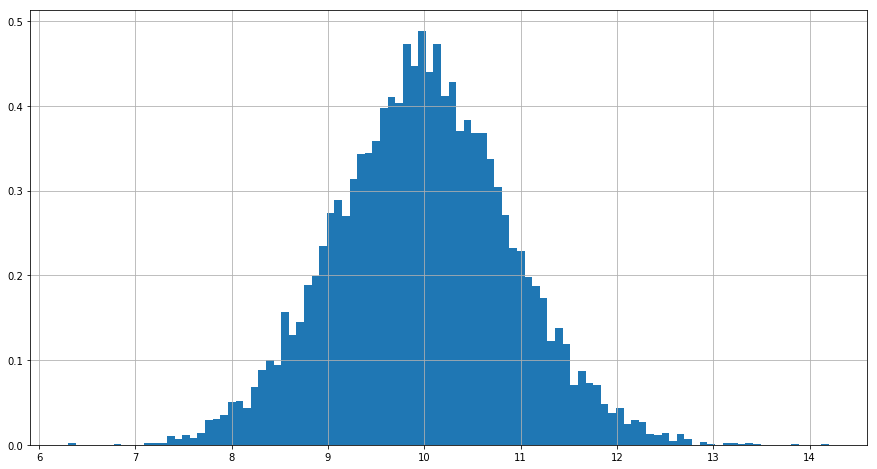

In [65]:
collection['meanlist'].hist(bins=100, normed=1,figsize=(15,8))

When we draw a histogram with the collection of sample means, it looks symmetric as a normal distribution. However, when we do it with the variance, it seems that is right-skewed. So, if the population mean is normal, then the sample mean is also normal. So, why variance is different?  

C:\Users\ramir\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BD918CEA20>]],
      dtype=object)

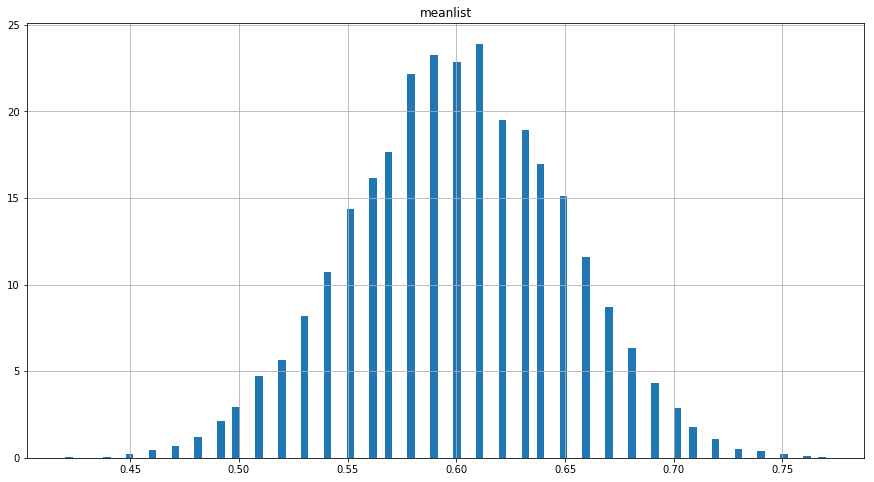

In [66]:
sample_size = 100
samplemeanlist = []
apop =  pd.DataFrame([1, 0, 1, 0, 1])
for t in range(10000):
    sample = apop[0].sample(sample_size, replace=True)  # small sample size
    samplemeanlist.append(sample.mean())

acollec = pd.DataFrame()
acollec['meanlist'] = samplemeanlist
acollec.hist(bins=100, normed=1,figsize=(15,8))

Central limit theorem says that if sample size is larger enough, the distribution of sample mean is approximately normal. We can conclude that, even if the population is not normal, the sample is approximtely normal if the sample size is large enough. It will dependes on the quantity of samples generated from the same population and the size of the samples. If we put larger size of samples, if will give us a result similar to a normal distribution. 

#### Confidence interval with Apple

Now, we are going to estimate te average return using confidence intervals. 

In [67]:
appl.head()

,Open,High,Low,Close,Adj Close,Volume,LogReturn,Return
Date,,,,,,,,
2019-04-01,191.639999,191.679993,188.380005,191.240005,188.769211,27862000,0.014432,2.779999
2019-04-02,191.089996,194.460007,191.050003,194.020004,191.513290,22765700,0.006832,1.330002
2019-04-03,193.250000,196.500000,193.149994,195.350006,192.826111,23271800,0.001739,0.339996
2019-04-04,194.789993,196.369995,193.139999,195.690002,193.161682,19114300,0.006672,1.309998
2019-04-05,196.449997,197.100006,195.929993,197.000000,194.454758,18526600,0.015614,3.100006


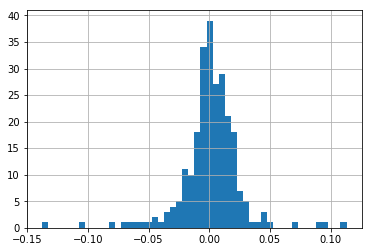

In [68]:
appl['LogReturn'].hist(bins=50)

We can sample mean to get the real average return, which is the population mean in our example. If a sample is a good representation of the population, the population mean should be close to sample mean. Our task is to estimate population mean using interval with lower and upper bound. First, we need to standardize sample mean, because sample has different mean and a standard deviation. For a normal distribution it is not difficult to find the two quantities z(a/2) and z1-(a/2) such that in the middel the probability is 1-a. 

a (alpha) refers to the likelihood that the true population parameters lies outside the confidence interval. Alpha is usually expressed as a proportion. Thus, if the confidence level is 95%, then alpha would equal 1 - 0.95 or 0.05.

To build the interval for the average return, we need to find quantiles of the mean distribution. We can use the norm.ppf to get the quantiles. 

In [69]:
#values for calculating the 80% confidence interval
#if confidence interval is 80% (0.8), then alpha (a) is 0.2
z_left = norm.ppf(0.1) #alpha in this case is 0.8. So: z(a/2) -> (0.2/2)
z_right = norm.ppf(0.9) #1-(a/2) -> 1-0.2/2 = 0.9
sample_mean = appl['LogReturn'].mean()
sample_std = appl['LogReturn'].std(ddof = 1)/(appl.shape[0])**0.5

In [70]:
interval_left = sample_mean+z_left*sample_std
interval_right = sample_mean+z_right*sample_std
print('Sample Mean is ',sample_mean)
print('************************************')
print('80% confidence interval is ')
print(interval_left, interval_right)

Sample Mean is  0.0011307385340900366
************************************
80% confidence interval is 
-0.0008461468257719889 0.003107623893952062


So, average return of Apple stocks falls in this interval with 80% chance. This implies that there is an 80% of chance that the average stock return will be between -0.08% and 0.3%.

#### Confidence interval with Microsoft

In [71]:
ms['logReturn'] = np.log(ms['Close'].shift(-1)) - np.log(ms['Close'])

sample_size = ms['logReturn'].shape[0]
sample_mean = ms['logReturn'].mean()
sample_std = ms['logReturn'].std(ddof=1) / sample_size**0.5
z_left_ms = norm.ppf(0.05)
z_right_ms = norm.ppf(0.95)
interval_left_ms = sample_mean+z_left_ms*sample_std
interval_right_ms = sample_mean+z_right_ms*sample_std

In [72]:
print('90% confidence interval is ', (interval_left_ms*100, interval_right_ms*100))

90% confidence interval is  (-0.13100807087613867, 0.36791543107121116)


In [73]:
#We can do the same for Facebook

fb['logReturn'] = np.log(fb['Close'].shift(-1)) - np.log(fb['Close'])

sample_size = fb['logReturn'].shape[0]
sample_mean = fb['logReturn'].mean()
sample_std = fb['logReturn'].std(ddof=1) / sample_size**0.5
z_left_fb = norm.ppf(0.05)
z_right_fb = norm.ppf(0.95)
interval_left_fb = sample_mean+z_left_fb*sample_std
interval_right_fb = sample_mean+z_right_fb*sample_std

print('90% confidence interval is ', (interval_left_fb*100, interval_right_fb*100))

90% confidence interval is  (-0.25162829510977697, 0.23853231767501532)


#### Hypotesis testing

Sometimes we need to validate some hipothesis.

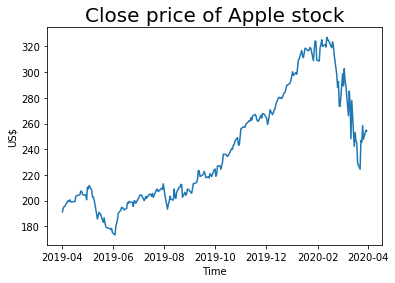

In [74]:
plt.title('Close price of Apple stock', size = 20)
plt.xlabel('Time',size=10)
plt.ylabel('US$',size=10)
plt.plot(appl.loc[:,'Close'])

If we plot daily return we got that there are days of positive and days of negative return 

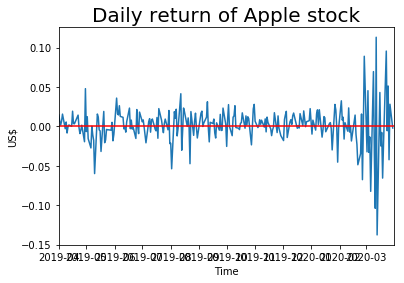

In [75]:
plt.title('Daily return of Apple stock', size = 20)
plt.xlabel('Time',size=10)
plt.ylabel('US$',size=10)
plt.xlim(appl.index[0], appl.index[-1])
plt.plot(appl.loc[:,'LogReturn'])
plt.axhline(0, color='red')

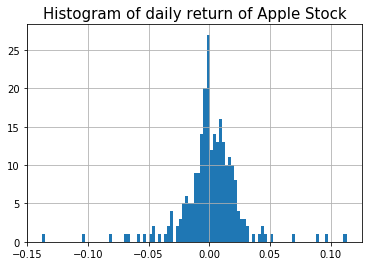

In [76]:
plt.title('Histogram of daily return of Apple Stock', size = 15)
appl.loc[:, 'LogReturn'].dropna().hist(bins=100)

In the histogram, the daily return is approximately 0. 

To test the validaty of an hypothesis, we have a statistics tool. The null hypothesis is assertion we are against. Alternative hypothesis is a conclusion we accept whenever we reject the null. So, in our example, the null hypothesis is that the average daily return is not equal to 0 and the alternative hypothesis is that the average daily return is not equal to 0.So, to reject or not the hypothesis we use zhat which must be different from 0.

In [77]:
xbar = appl['LogReturn'].mean()
s = appl['LogReturn'].std(ddof=1)
n = appl['LogReturn'].shape[0]
zhat = (xbar-0)/(s/(n**0.5))
print (zhat)

0.7330216349448969


To prove this we use the two tail test.

### Linear regression models for financial analysis

Data in financial market are different than those used on other fields. They are usually non-stationary and have a high level of noises. Model evaluation is more important than model building. A statistical usefull model is not necesarily succesful in terms of profits. The most used prediction model is multiple linear regression. 

#### Asociation of random variables

Until now we have talked about single variables. But in real life, we may be intrested in association of two or multiple random variables. For example: is there any association between the stock price change of tomorrow and the number of full days in the last five days? In this part of the course we will explain how to measure strengths etween two random variables. 

In statistics we use covariance to measure the association between two variables. The covariance is a value that indicates the grade of mutual variation of two random variables regarding it's mean. However, we need to factorize it out in order to get a meassure only for the strenght of association, that is the coefficient of correlation. In the formula of the coeficient, the covariance is divided by the standard deviation of both variables. The correlation will only take values between -1 and 1. When correlation is neer one there is a good correlation (in the chart, we can see all the point together doing a line). In that cases we say that variable X and variable Y have a strong positive correlation: as X increases, Y is more likely to increase. When correlation is near -1, if X increases, Y is more likely to decrease. 

To see the correlation between variables, we can use scatter matrix, that is a matrix of scatter plots for each pair of random variables. The histograms in diagonal positions are those of variables. The scatter plot can only find association between two variables, it cannot find the association between one variable and othe multiple variables. To achieve that, we need multiple linear regression. 

#### Simple linear regression model 

In real life, we also want to estimate one variable and othe rmultiple variables, which are the "predictors". Linear regression model is used to estimate response variable which is also called prediction. The simple linear regression model has only one predictor. Idealy, we want to get a line where all sum of squared errors (SSE) are very small, what is the same to say that all sample pairs are close to the predict line you found.  

#### Multiple linear regression

We are going to apply multiple linear regression to generate a signal for the growth of SPY (the exchange-trade fund that tracks S&P 500). We are going to use multiple indices of the global market to predict the price change of SPY. The reason we choose SPY it is very suitable for trading frequently. Each unit of SPY is always approximately one over 10 of S&P 500 index level. To earn SPY it requires very low fee ratios. Volatiliy of SPY is very high. 

We are going to predict data price change of SPY when US market opens in the morning. We know that different indeces in different markets are highly correlated. In this model, we are going to use AORD from Australia, Nikkei from Japan, HSI from Hong Kong, DAX from Germany, CAC40 from France, S&P 500, Dow Jones (DJI) and Nasdaq from US to predict the daily price change from SPY. 

In [78]:
start = datetime.datetime(2010, 1, 1) #starting date
end = datetime.datetime(2020, 4, 2) #ending date

aord = web.DataReader("^AORD", 'yahoo', start, end) #(stock, platform, start, end)
nikkei = web.DataReader("^N225", 'yahoo', start, end)
hsi = web.DataReader("^HSI", 'yahoo', start, end)
hsi = web.DataReader("^HSI", 'yahoo', start, end)
daxi = web.DataReader("^GDAXI", 'yahoo', start, end)
cac40 = web.DataReader("^FCHI", 'yahoo', start, end)
sp500 = web.DataReader("^GSPC", 'yahoo', start, end)
dji = web.DataReader("^DJI", 'yahoo', start, end)
nasdaq = web.DataReader("^IXIC", 'yahoo', start, end)
spy = web.DataReader("SPY", 'yahoo', start, end)

In [79]:
spy.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,113.389999,111.510002,112.370003,113.330002,118944600.0,92.246048
2010-01-05,113.680000,112.849998,113.260002,113.629997,111579900.0,92.490204
2010-01-06,113.989998,113.430000,113.519997,113.709999,116074400.0,92.555328
2010-01-07,114.330002,113.180000,113.500000,114.190002,131091100.0,92.946060
2010-01-08,114.620003,113.660004,113.889999,114.570000,126402800.0,93.255348


From this data, we will use only open price to simplify the discussion. We will have three predictors, the first one is a one-day lag variables from US market (OPEN - open price of the last day) for the four indexes. The second group is a one-day lag variables from European markets (OPEN - open price of the last day) for the two indexes. Last group are the asian markets (close price - open price) of the three indexes. 

First we generate an empty Data Frame to be the same as the index SPY. Then, we define the contents and predictors we defined in last slide. 

In [80]:
indicepanel=pd.DataFrame(index=spy.index)

indicepanel['spy']=spy['Open'].shift(-1)-spy['Open']
indicepanel['spy_lag1']=indicepanel['spy'].shift(1)
indicepanel['sp500']=sp500["Open"]-sp500['Open'].shift(1)
indicepanel['nasdaq']=nasdaq['Open']-nasdaq['Open'].shift(1)
indicepanel['dji']=dji['Open']-dji['Open'].shift(1)

indicepanel['cac40']=cac40['Open']-cac40['Open'].shift(1)
indicepanel['daxi']=daxi['Open']-daxi['Open'].shift(1)

indicepanel['aord']=aord['Close']-aord['Open']
indicepanel['hsi']=hsi['Close']-hsi['Open']
indicepanel['nikkei']=nikkei['Close']-nikkei['Open']
indicepanel['Price']=spy['Open']

In [81]:
indicepanel.head()

,spy,spy_lag1,sp500,nasdaq,dji,cac40,daxi,aord,hsi,nikkei,Price
Date,,,,,,,,,,,
2010-01-04,0.889999,NaN,NaN,NaN,NaN,NaN,NaN,39.700195,-36.759766,45.450195,112.370003
2010-01-05,0.259995,0.889999,16.099976,12.860107,153.869141,60.219971,68.419922,3.099609,187.429688,-37.610352,113.260002
2010-01-06,-0.019997,0.259995,3.049927,0.439941,-19.839844,2.020020,-11.549805,-17.700195,59.208984,21.900391,113.519997
2010-01-07,0.389999,-0.019997,0.560059,-9.619873,6.390625,-8.489990,-15.590332,10.800293,-278.580078,-61.089844,113.500000
2010-01-08,1.190002,0.389999,4.250000,-5.850098,35.290039,36.679932,11.820312,NaN,14.000000,55.020508,113.889999


In [82]:
#We will fill the NaN values
indicepanel = indicepanel.fillna(method='ffill')
indicepanel = indicepanel.dropna()

In [83]:
indicepanel.isnull().sum()

spy         0
spy_lag1    0
sp500       0
nasdaq      0
dji         0
cac40       0
daxi        0
aord        0
hsi         0
nikkei      0
Price       0
dtype: int64

In [84]:
#We split the data in train to build the model and test to test the model.
Train = indicepanel.iloc[-2000:-1000, :]
Test = indicepanel.iloc[-1000:, :]
print(Train.shape, Test.shape)

(1000, 11) (1000, 11)


We use equal size of samples for train and test because the stock data is very noisy. 

Now, we use a scatter matrix to view the correlations of the variables.

C:\Users\ramir\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


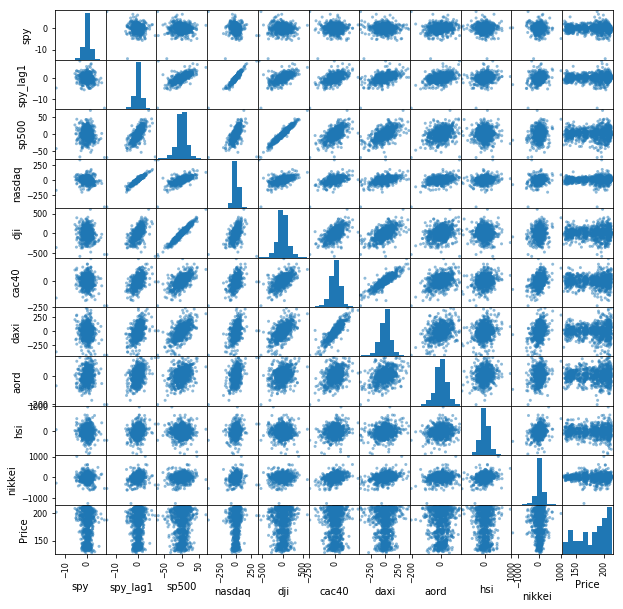

In [85]:
sm = scatter_matrix(Train, figsize = (10,10))

What we can see here is that there is no explicit pattern, which is a evidence of high noisy properties of stock markets. We are going to see the correlation of the markets.

In [86]:
Train.iloc[:,:-1].corr()['spy']

spy         1.000000
spy_lag1   -0.083215
sp500      -0.025122
nasdaq     -0.087152
dji        -0.038094
cac40      -0.062988
daxi       -0.053925
aord        0.168330
hsi        -0.048244
nikkei     -0.053575
Name: spy, dtype: float64

European and asian markets have more correlation with SPY than the US ones. 

In [88]:
formula = 'spy~spy_lag1+sp500+nasdaq+dji+cac40+aord+daxi+nikkei+hsi'
lm = smf.ols(formula=formula, data=Train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    spy   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     9.475
Date:                Fri, 03 Apr 2020   Prob (F-statistic):           6.21e-14
Time:                        19:36:33   Log-Likelihood:                -1820.6
No. Observations:                1000   AIC:                             3661.
Df Residuals:                     990   BIC:                             3710.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0561      0.048      1.171      0.242      -0.038       0.150
spy_lag1      -0.0199      0.101     -0.197      0.844      -0.219       0.179
sp500          0.0564      0.015      3.780      0.000       0.027       0.086
nasdaq        -0.0076      0.003     -2.223      0.026      -0.014      -0.001
dji           -0.0054      0.002     -3.432      0.001      -0.008      -0.002
cac40         -0.0034      0.002     -1.581      0.114      -0.008       0.001
aord           0.0100      0.001      7.881      0.000       0.008       0.013
daxi           0.0002      0.001      0.187      0.852      -0.002       0.002
nikkei        -0.0003      0.000     -1.057      0.291      -0.001       0.000
hsi           -0.0003      0.000     -0.897      0.370      -0.001       0.000
==============================================================================
Omnibus:                      330.450   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5636.734
Skew:                          -1.050   Prob(JB):                         0.00
Kurtosis:                      14.440   Cond. No.                         434.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the summary there a couple of things that we must pay attention. The first is the p value for F-statistics. F-test is for overall significance of the multiple linear equation model. P value (6.21e-14) < 0.05 means that our model includes usefull predictors. The summary also includes the p value of individual predictors (P>|t|). We found out that most of the predictors are not significat except AORD. 

In [87]:
Train.iloc[:,:-1].corr()

,spy,spy_lag1,sp500,nasdaq,dji,cac40,daxi,aord,hsi,nikkei
spy,1.000000,-0.083215,-0.025122,-0.087152,-0.038094,-0.062988,-0.053925,0.168330,-0.048244,-0.053575
spy_lag1,-0.083215,1.000000,0.685139,0.943315,0.589471,0.527322,0.503967,0.396166,0.198971,0.256830
sp500,-0.025122,0.685139,1.000000,0.627344,0.962170,0.629485,0.614316,0.325860,-0.006521,0.152702
nasdaq,-0.087152,0.943315,0.627344,1.000000,0.510915,0.496122,0.486651,0.391910,0.204243,0.217907
dji,-0.038094,0.589471,0.962170,0.510915,1.000000,0.612686,0.604176,0.298127,-0.040197,0.131019
cac40,-0.062988,0.527322,0.629485,0.496122,0.612686,1.000000,0.876750,0.399828,0.207724,0.342263
daxi,-0.053925,0.503967,0.614316,0.486651,0.604176,0.876750,1.000000,0.381301,0.191219,0.321694
aord,0.168330,0.396166,0.325860,0.391910,0.298127,0.399828,0.381301,1.000000,0.167111,0.194483
hsi,-0.048244,0.198971,-0.006521,0.204243,-0.040197,0.207724,0.191219,0.167111,1.000000,0.270212
nikkei,-0.053575,0.256830,0.152702,0.217907,0.131019,0.342263,0.321694,0.194483,0.270212,1.000000


Now, we are going to predict daily change. 

In [89]:
Train['PredictedY'] = lm.predict(Train)
Test['PredictedY'] = lm.predict(Test)

C:\Users\ramir\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\ramir\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


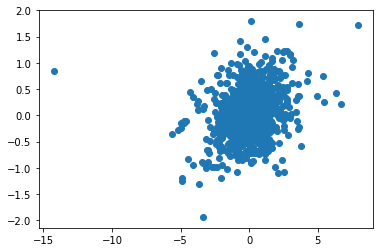

In [90]:
plt.scatter(Train['spy'], Train['PredictedY'])

We can see that it has a positive correlation.

In [91]:
def adjustedMetric(data, model, model_k, yname):
    data['yhat'] = model.predict(data)
    SST = ((data[yname] - data[yname].mean())**2).sum()
    SSR = ((data['yhat'] - data[yname].mean())**2).sum()
    SSE = ((data[yname] - data['yhat'])**2).sum()
    r2 = SSR/SST
    adjustR2 = 1 - (1-r2)*(data.shape[0] - 1)/(data.shape[0] -model_k -1)
    RMSE = (SSE/(data.shape[0] -model_k -1))**0.5
    return adjustR2, RMSE

In [92]:
def assessTable(test, train, model, model_k, yname):
    r2test, RMSEtest = adjustedMetric(test, model, model_k, yname)
    r2train, RMSEtrain = adjustedMetric(train, model, model_k, yname)
    assessment = pd.DataFrame(index=['R2', 'RMSE'], columns=['Train', 'Test'])
    assessment['Train'] = [r2train, RMSEtrain]
    assessment['Test'] = [r2test, RMSEtest]
    return assessment

In [93]:
assessTable(Test, Train, lm, 9, 'spy')

C:\Users\ramir\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Train,Test
R2,0.070936,0.088440
RMSE,1.501861,2.633898


RMSE differ dramaticaly, we can say that there is overfitting.

In [98]:
Train['PredictedY'] = lm.predict(Train)
Test['PredictedY'] = lm.predict(Test)

Train['Order'] = [1 if sig>0 else -1 for sig in Train['PredictedY']]
Train['Profit'] = Train['spy'] * Train['Order']

Train['Wealth'] = Train['Profit'].cumsum()
print('Total profit made in Train: ', Train['Profit'].sum())

C:\Users\ramir\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\ramir\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Total profit made in Train:  321.8100280761719


C:\Users\ramir\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\ramir\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\ramir\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

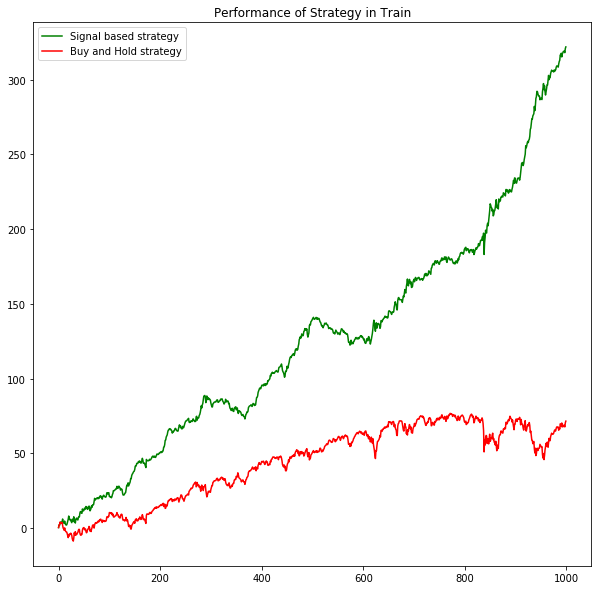

In [99]:
plt.figure(figsize=(10, 10))
plt.title('Performance of Strategy in Train')
plt.plot(Train['Wealth'].values, color='green', label='Signal based strategy')
plt.plot(Train['spy'].cumsum().values, color='red', label='Buy and Hold strategy')
plt.legend()
plt.show()

In [100]:
# Test
Test['Order'] = [1 if sig>0 else -1 for sig in Test['PredictedY']]
Test['Profit'] = Test['spy'] * Test['Order']

Test['Wealth'] = Test['Profit'].cumsum()
print('Total profit made in Test: ', Test['Profit'].sum())

C:\Users\ramir\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ramir\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Total profit made in Test:  219.3296356201172


C:\Users\ramir\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


#### Sharpe ratio

Sharpe ratio meassures exess return per unit of deviation in an investment asset or trading strategy. 

In [101]:
Train['Wealth'] = Train['Wealth'] + Train.loc[Train.index[0], 'Price']
Test['Wealth'] = Test['Wealth'] + Test.loc[Test.index[0], 'Price']

C:\Users\ramir\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\ramir\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [102]:
# Sharpe Ratio on Train data
Train['Return'] = np.log(Train['Wealth']) - np.log(Train['Wealth'].shift(1))
dailyr = Train['Return'].dropna()

print('Daily Sharpe Ratio is ', dailyr.mean()/dailyr.std(ddof=1))
print('Yearly Sharpe Ratio is ', (252**0.5)*dailyr.mean()/dailyr.std(ddof=1))

Daily Sharpe Ratio is  0.2062867435247494
Yearly Sharpe Ratio is  3.2747005328151046


C:\Users\ramir\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [103]:
# Sharpe Ratio in Test data
Test['Return'] = np.log(Test['Wealth']) - np.log(Test['Wealth'].shift(1))
dailyr = Test['Return'].dropna()

print('Daily Sharpe Ratio is ', dailyr.mean()/dailyr.std(ddof=1))
print('Yearly Sharpe Ratio is ', (252**0.5)*dailyr.mean()/dailyr.std(ddof=1))

Daily Sharpe Ratio is  0.08690086319951659
Yearly Sharpe Ratio is  1.3795084364565942


C:\Users\ramir\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


The return per unit risk is not very consistent.

#### Maximun drawdown

It is a maximun percentage decline in the strategy from the historical peak profit at each point in time. Maximun drawdown is that risk of mirror for extreme loss of a strategy. To calculate it we use the cummax method. 

In [104]:
Train['Peak'] = Train['Wealth'].cummax()
Train['Drawdown'] = (Train['Peak'] - Train['Wealth'])/Train['Peak']
print('Maximum Drawdown in Train is ', Train['Drawdown'].max())

Maximum Drawdown in Train is  0.06974474371234712


C:\Users\ramir\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\ramir\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [105]:
# Maximum Drawdown in Test data
Test['Peak'] = Test['Wealth'].cummax()
Test['Drawdown'] = (Test['Peak'] - Test['Wealth'])/Test['Peak']
print('Maximum Drawdown in Test is ', Test['Drawdown'].max())

Maximum Drawdown in Test is  0.1896441274070032


C:\Users\ramir\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ramir\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


The maximun drawdown of the train deffers from the test. That means that if we apply the strategy of train in test, the maximum we can loss is 19%. 